In [46]:
%load_ext autoreload
%autoreload 2
import sys

sys.path.append("../")

from src.global_vars import BASE_DIR
from src.main import get_data

data_load_config = {
    "study_accessions": "MGYS00003619",
    "summary_type": "GO_abundances",
    "pipeline_version": "v5.0",
    "metdata_cols_to_use_as_features": [],
    "label_col": "Health state__elixir",
}

data, labels = get_data(BASE_DIR / "data", **data_load_config)


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


2024-12-08 16:31:48.771 | SUCCESS  | src.mgnify_helper:get_secondary_accessions:329 - Found secondary accessions for 2 studies.
2024-12-08 16:31:48.776 | DEBUG    | src.data.dataloader:load_data:56 - Loading GO data
2024-12-08 16:31:48.987 | DEBUG    | src.data.dataloader:load_data:59 - Summary data: 
	            ERZ1742260  ERZ1742270  ERZ1742261  ...  ERZ652679  ERZ652689  ERZ652699
	GO                                              ...                                 
	GO:0000001           0           0           0  ...          0          0          0
	GO:0000002           0           0           0  ...          0          0          0
	GO:0000012           0           0           0  ...          0          0          0
	...                ...         ...         ...  ...        ...        ...        ...
	GO:1990904           0           0           0  ...          0          0          0
	GO:1990961           7          14           3  ...          5          3          0
	GO:20010

Data head:
            GO:0000001  GO:0000002  GO:0000012  GO:0000015  GO:0000030  \
SRS1719087           0           0           0           7           4   
SRS1719088           0           0           0           5           1   
SRS1719089           0           0           0          28           1   
SRS1719090           0           0           0          18           2   
SRS1719092           0           0           0          21           0   

            GO:0000034  GO:0000041  GO:0000045  GO:0000049  GO:0000062  ...  \
SRS1719087           1           3           0          30           3  ...   
SRS1719088           2           3           0          26           1  ...   
SRS1719089           5           4           0          93           0  ...   
SRS1719090           5           6           0          64           2  ...   
SRS1719092           0           1           0          67           1  ...   

            GO:1990316  GO:1990380  GO:1990397  GO:1990426  GO:199061

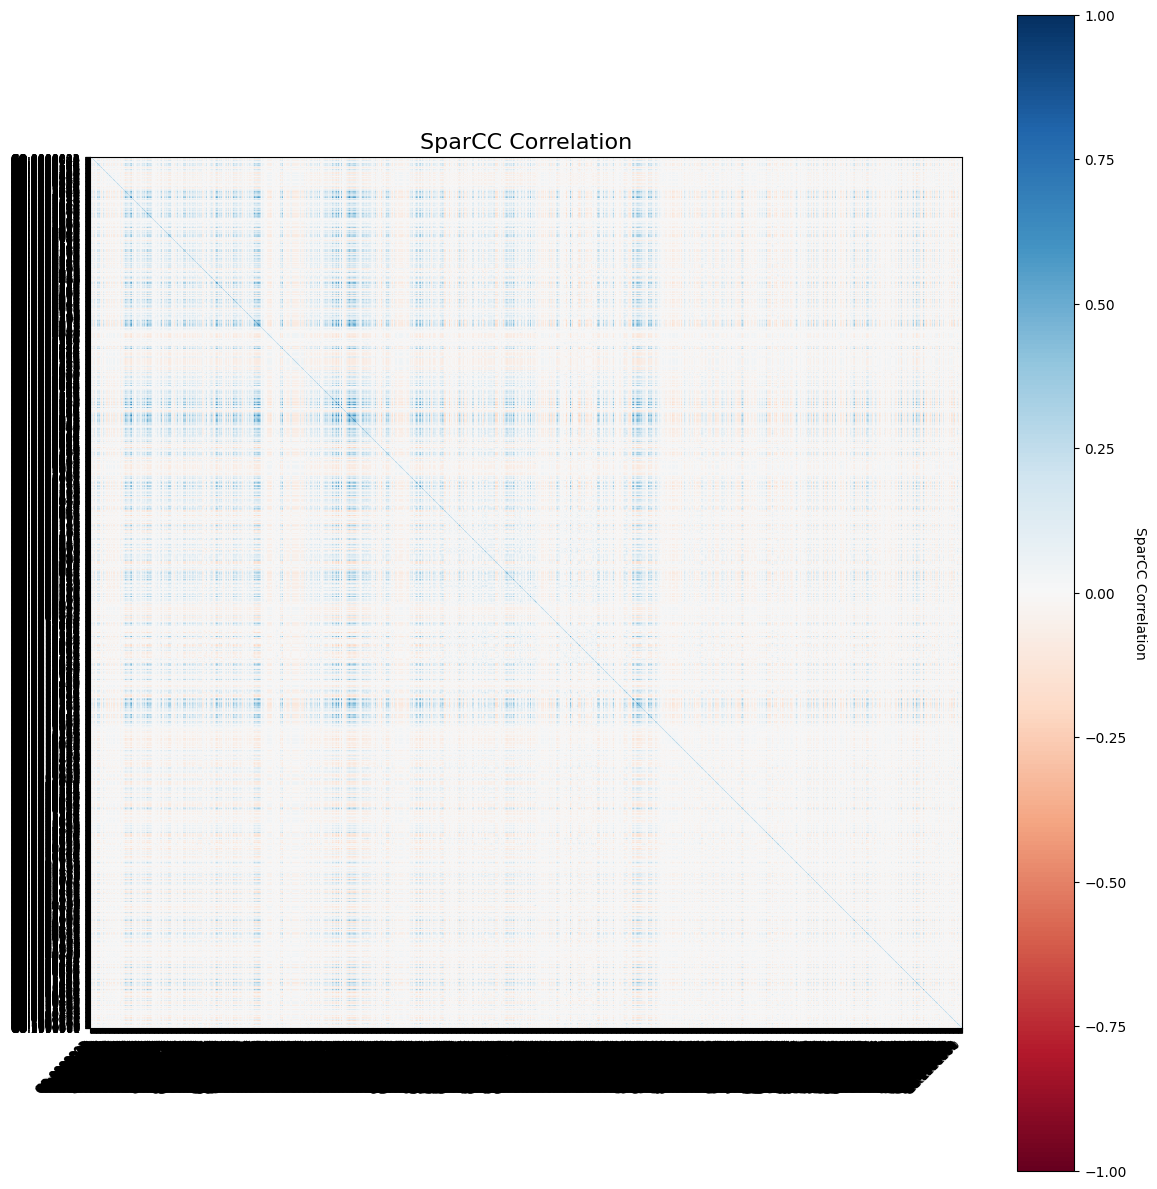

SparCC label aware correlation:
SparCC healthy label aware correlation heatmap:


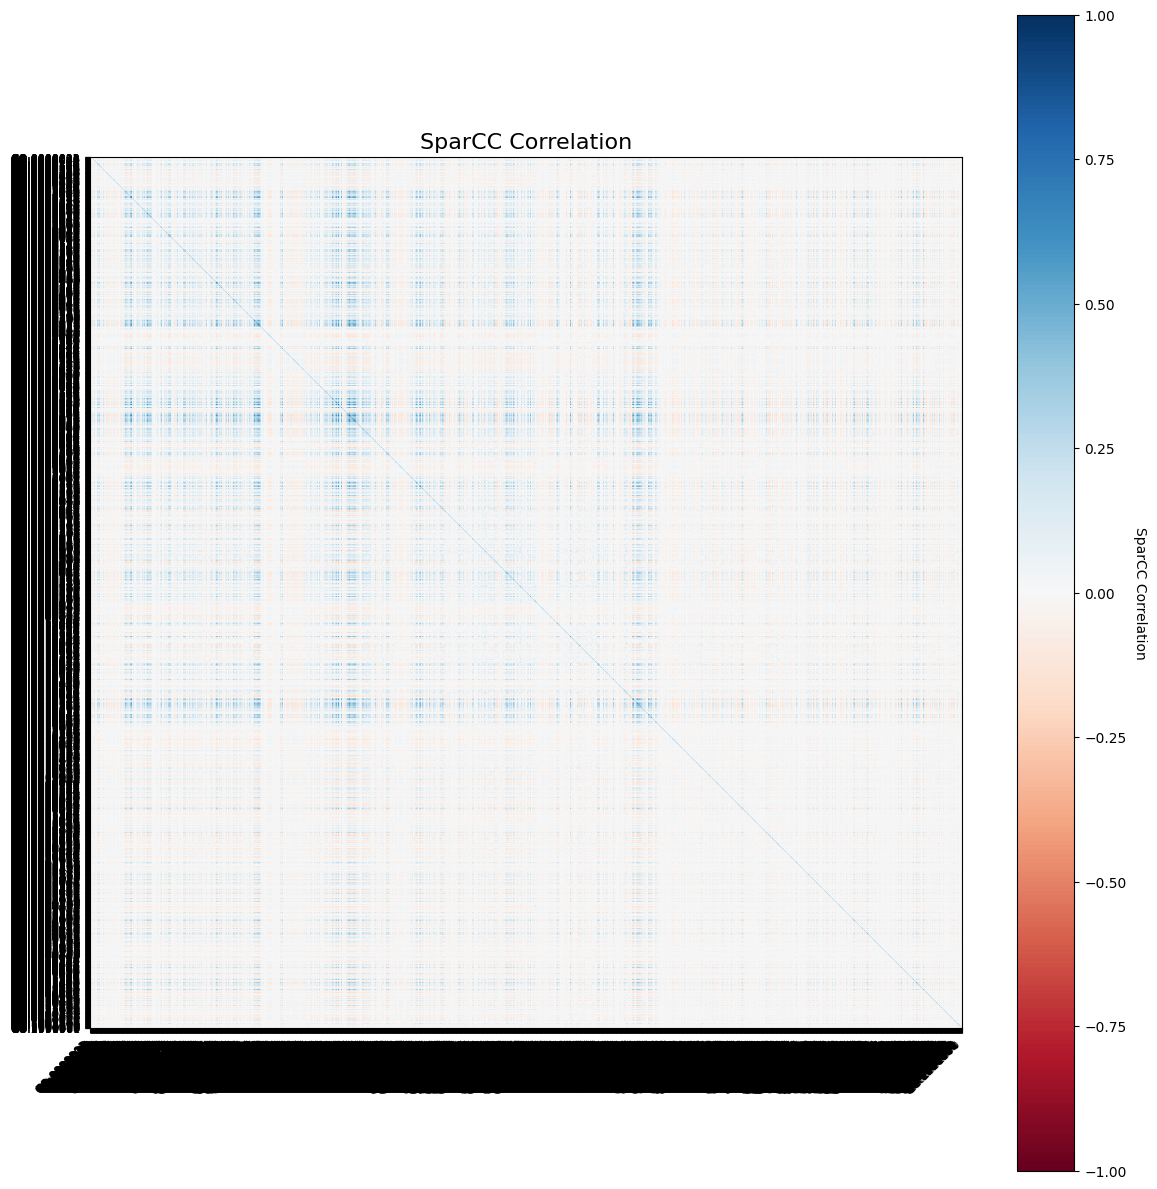

SparCC diseased label aware correlation heatmap:


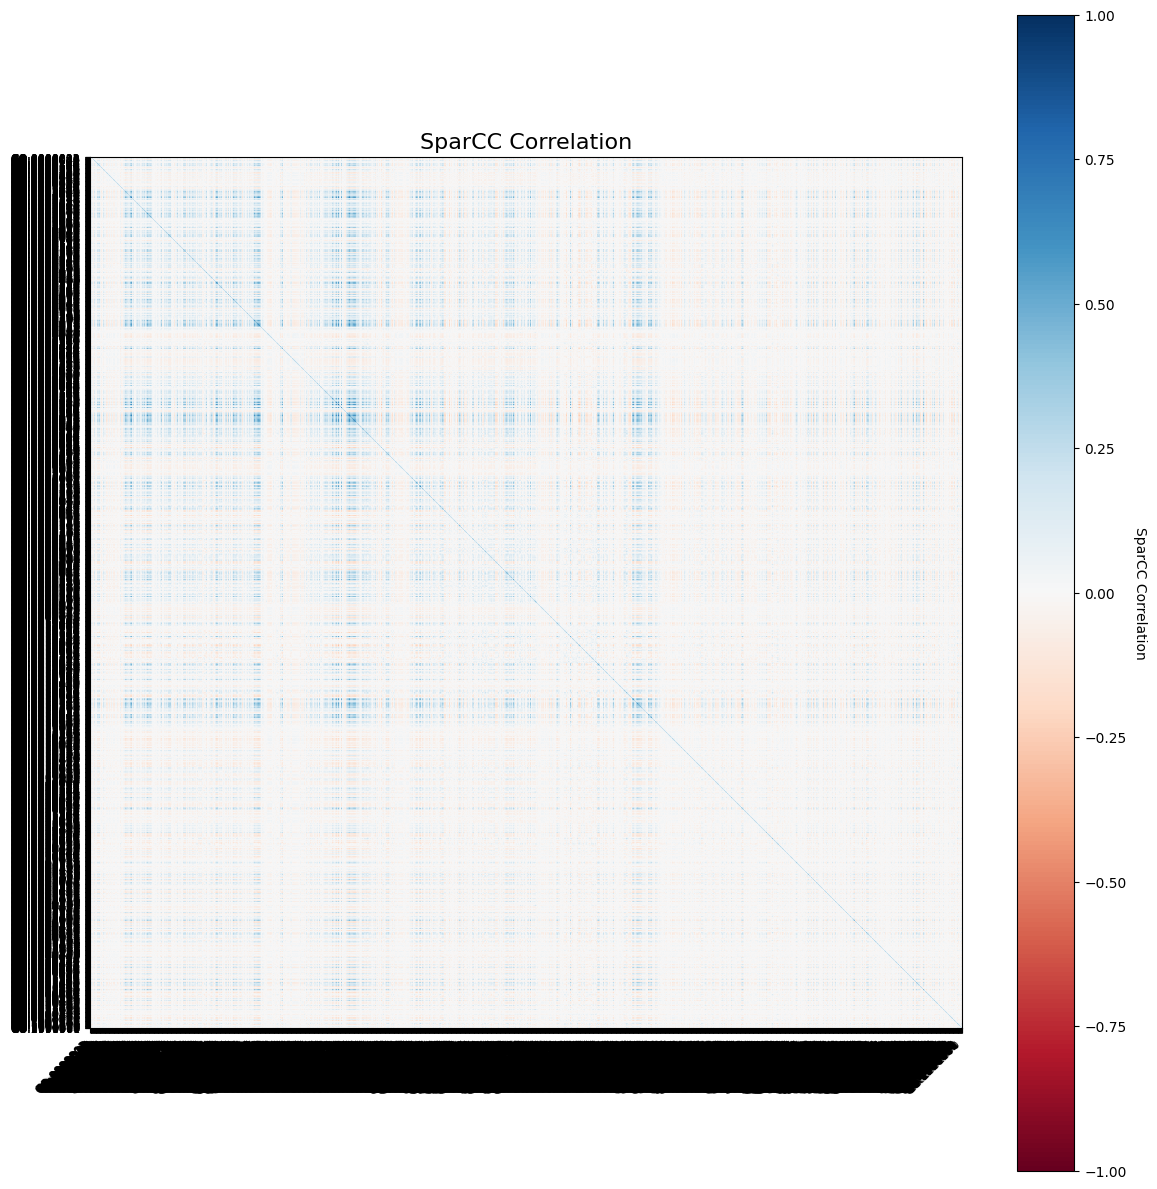

PCA analysis:
U-MAP analysis:


In [3]:
import pandas as pd
import plotly.io as pio

pio.renderers.default = "notebook"
import plotly.express as px

from src.data.eda_helper_function import plot_heatmap, sparcc_correlation


def explanatory_data_analysis(
    data: pd.DataFrame, labels: pd.Series, label_healthy: str, label_diseased: str
):
    print("Data head:")
    print(data.head())
    print("Data shape:")
    print(data.shape)
    print("Labels head:")
    print(labels.head())
    print("Labels shape:")
    print(labels.shape)
    print("-" * 20)

    print("Zero count:")

    print("Label-size zero count:")

    sparcc_cor, sparcc_cov = sparcc_correlation(data, ".")
    print("SparCC correlation heatmap:")
    #  use good color scale
    plot_heatmap(sparcc_cor, list(data.columns))

    print("SparCC label aware correlation:")
    data_healthy = data[labels == label_healthy]
    healthy_sparcc_cor, healthy_sparc_cov = sparcc_correlation(data_healthy, ".")
    print("SparCC healthy label aware correlation heatmap:")
    plot_heatmap(healthy_sparcc_cor, list(data.columns))
    data_diseased = data[labels == label_diseased]
    diseased_sparcc_cor, diseased_sparcc_cov = sparcc_correlation(data_diseased, ".")
    print("SparCC diseased label aware correlation heatmap:")
    plot_heatmap(diseased_sparcc_cor, list(data.columns))

    # More ...


explanatory_data_analysis(data, labels, "Healthy", "Diseased")

C:\Users\shaya\AppData\Local\Temp\ipykernel_3968\4021581368.py:45: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.



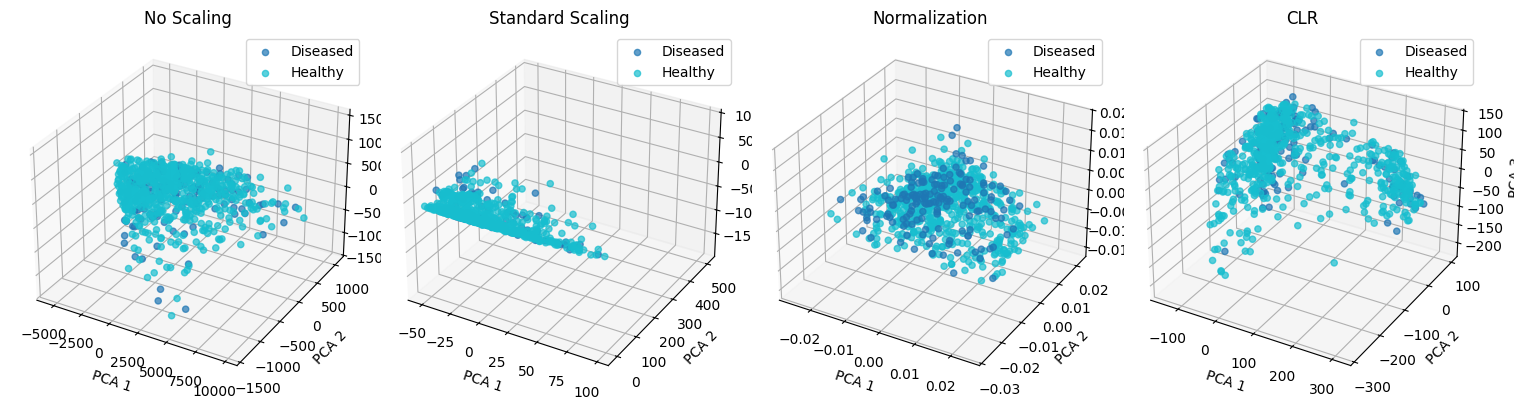

C:\Users\shaya\AppData\Local\Temp\ipykernel_3968\4021581368.py:45: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.



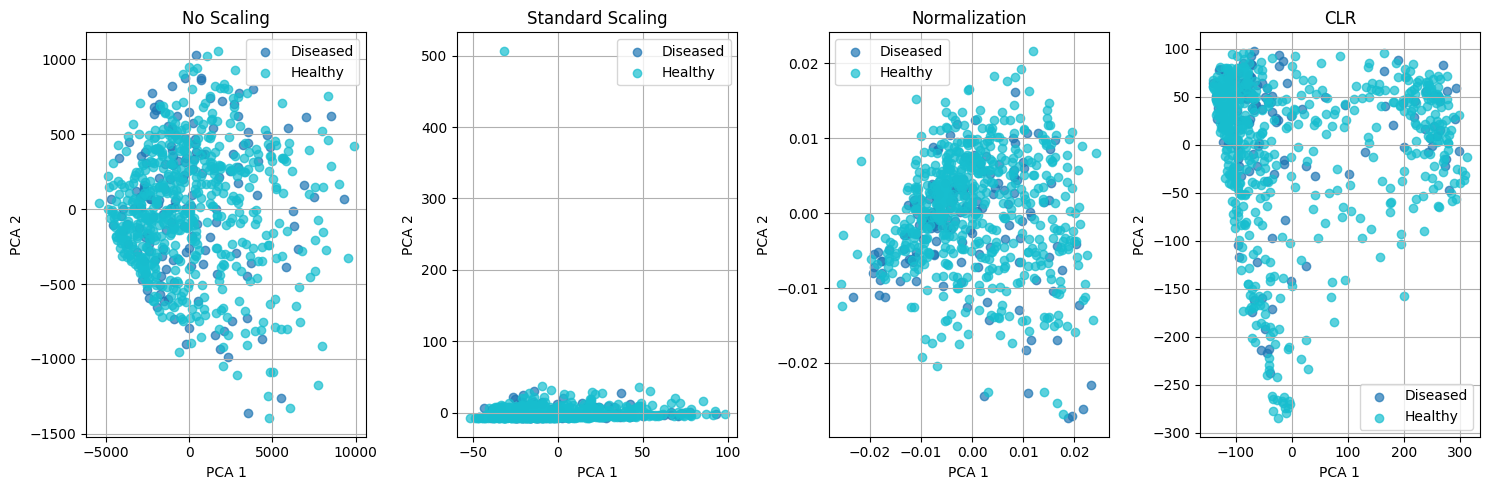

U-MAP analysis:


In [76]:
# explanatory_data_analysis(data, labels, "Healthy", "Diseased")

import numpy as np
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import StandardScaler
from sklearn.preprocessing import Normalizer

from src.sparcc.compositional_methods import clr


# Helper function for plotting
def plot_pca(ax, data, title, n_components, unique_labels, colors):
    pca = PCA(n_components=n_components)
    transformed = pca.fit_transform(data)
    for i, label in enumerate(unique_labels):
        indices = np.where(labels == label)
        coords = transformed[indices].T  # Transpose to unpack
        if n_components == 3:
            ax.scatter(*coords, label=label, color=colors(i), alpha=0.7)
        else:
            ax.scatter(*coords, label=label, color=colors(i), alpha=0.7)
    ax.set_title(title)
    ax.legend()

def plot_pca_analysis(data, labels, n_components=2, **kwargs):
    """
    Perform PCA and plot the results with per-label coloring.

    Args:
        data: Input data (numpy array or pandas DataFrame).
        labels: Array-like, labels for coloring points.
        n_components: Number of PCA components (2 for 2D, 3 for 3D).
    """
    # Determine the projection type
    projection = "3d" if n_components == 3 else None

    # Set up the plot
    fig, axes = plt.subplots(
        1, 4, figsize=(15, 5), subplot_kw={"projection": projection}
    )

    # Labels for coloring
    unique_labels = np.unique(labels)
    colors = plt.cm.get_cmap("Accent", len(unique_labels))

    # No scaling
    plot_pca(axes[0], data, "No Scaling", n_components, unique_labels, colors, **kwargs)

    # Standard scaling
    scaled_data = StandardScaler().fit_transform(data)
    plot_pca(axes[1], scaled_data, "Standard Scaling", n_components, unique_labels, colors, **kwargs)

    # Normalization
    normalized_data = Normalizer(norm="l1").fit_transform(data)
    plot_pca(axes[2], normalized_data, "Normalization", n_components, unique_labels, colors, **kwargs)

    # center-log-ratio transformation
    np_data = data.to_numpy(copy=True, dtype=np.float64)
    smallest_value = np.min(np_data[np_data.nonzero()])
    np_data[np_data == 0] = smallest_value / 1000000000
    clr_data = clr(np_data).compute()
    plot_pca(axes[3], clr_data, "CLR", n_components, unique_labels, colors, **kwargs)
    

    # Configure layout
    for ax in axes:
        ax.set_xlabel("PCA 1")
        ax.set_ylabel("PCA 2")
        if n_components == 3:
            ax.set_zlabel("PCA 3")
        ax.grid(True)

    plt.tight_layout()
    plt.show()


# Example usage
plot_pca_analysis(data, labels, n_components=3)  # For 3D PCA
plot_pca_analysis(data, labels, n_components=2)  # For 2D PCA




print("U-MAP analysis:")


AttributeError: 'numpy.ndarray' object has no attribute 'set_xlabel'

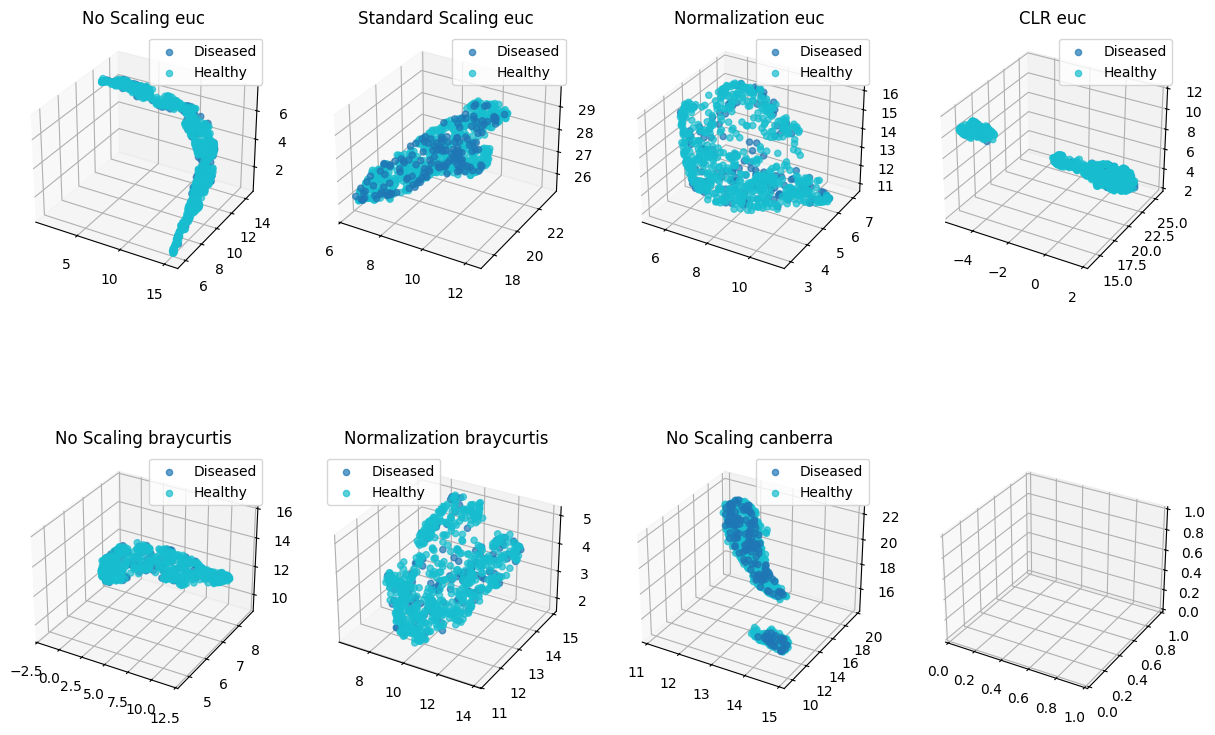

In [80]:
from umap import UMAP
def plot_umap(ax, data, title, n_components, unique_labels, colors, metric, n_neighbors: int = 100, min_dist: float = 0.1):
    umapper = UMAP(n_components=n_components, n_neighbors=n_neighbors, min_dist=min_dist, metric=metric)
    transformed = umapper.fit_transform(data)
    for i, label in enumerate(unique_labels):
        indices = np.where(labels == label)
        coords = transformed[indices].T  # Transpose to unpack
        if n_components == 3:
            ax.scatter(*coords, label=label, color=colors(i), alpha=0.7)
        else:
            ax.scatter(*coords, label=label, color=colors(i), alpha=0.7)
    ax.set_title(title)
    ax.legend()

def plot_umap_analysis(data, labels, n_components=2, **kwargs):
    """
    Perform PCA and plot the results with per-label coloring.

    Args:
        data: Input data (numpy array or pandas DataFrame).
        labels: Array-like, labels for coloring points.
        n_components: Number of PCA components (2 for 2D, 3 for 3D).
    """
    # Determine the projection type
    projection = "3d" if n_components == 3 else None

    # Set up the plot
    fig, axes = plt.subplots(
        2, 4, figsize=(15, 10), subplot_kw={"projection": projection}
    )

    # Labels for coloring
    unique_labels = np.unique(labels)
    colors = plt.get_cmap("Accent", len(unique_labels))

    # default umap
    plot_umap(axes[0, 0], data, "No Scaling euc", n_components, unique_labels, colors, metric="euclidean", **kwargs)

    # Standard scaling
    scaled_data = StandardScaler().fit_transform(data)
    plot_umap(axes[0, 1], scaled_data, "Standard Scaling euc", n_components, unique_labels, colors, metric="euclidean", **kwargs)

    # Normalization
    normalized_data = Normalizer(norm="l1").fit_transform(data)
    plot_umap(axes[0, 2], normalized_data, "Normalization euc", n_components, unique_labels, colors, metric="euclidean", **kwargs)

    # center-log-ratio transformation
    np_data = data.to_numpy(copy=True, dtype=np.float64)
    smallest_value = np.min(np_data[np_data.nonzero()])
    np_data[np_data == 0] = smallest_value / 1000000000
    clr_data = clr(np_data).compute()
    plot_umap(axes[0, 3], clr_data, "CLR euc", n_components, unique_labels, colors, metric="euclidean", **kwargs)

    #distance metric braycurtis
    plot_umap(axes[1, 0], data, "No Scaling braycurtis", n_components, unique_labels, colors, metric="braycurtis", **kwargs)

    # distance metric braycurtis with normalization
    normalized_data = Normalizer(norm="l1").fit_transform(data)
    plot_umap(axes[1, 1], normalized_data, "Normalization braycurtis", n_components, unique_labels, colors, metric="braycurtis", **kwargs)

    #distance metric canberra
    plot_umap(axes[1, 2], data, "No Scaling canberra", n_components, unique_labels, colors, metric="canberra", **kwargs)


    # Configure layout
    for ax in axes.flatten():
        ax.set_xlabel("PCA 1")
        ax.set_ylabel("PCA 2")
        if n_components == 3:
            ax.set_zlabel("PCA 3")
        ax.grid(True)

    plt.tight_layout()
    plt.show()

plot_umap_analysis(data, labels, n_components=3)  # For 3D UMAP
plot_umap_analysis(data, labels, n_components=2)  # For 2D UMAP


AttributeError: 'numpy.ndarray' object has no attribute 'set_xlabel'

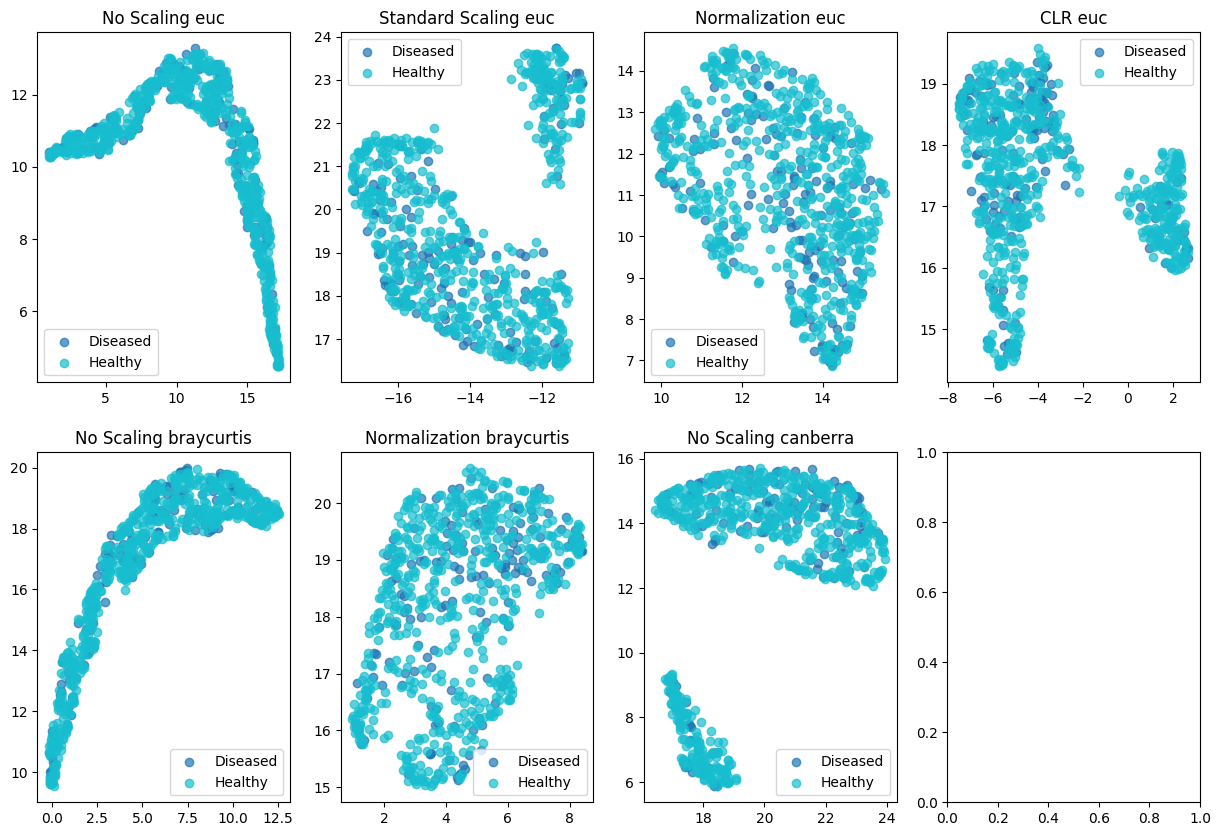

In [81]:
plot_umap_analysis(data, labels, n_components=2)  # For 2D UMAP